<a href="https://colab.research.google.com/github/Muditha98/keras_notebooks/blob/main/classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tensorflow and tf.keras
import tensorflow as tf

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


### Import the fashion MNIST dataset

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data

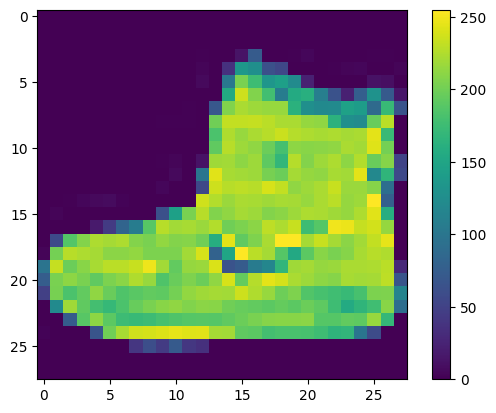

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

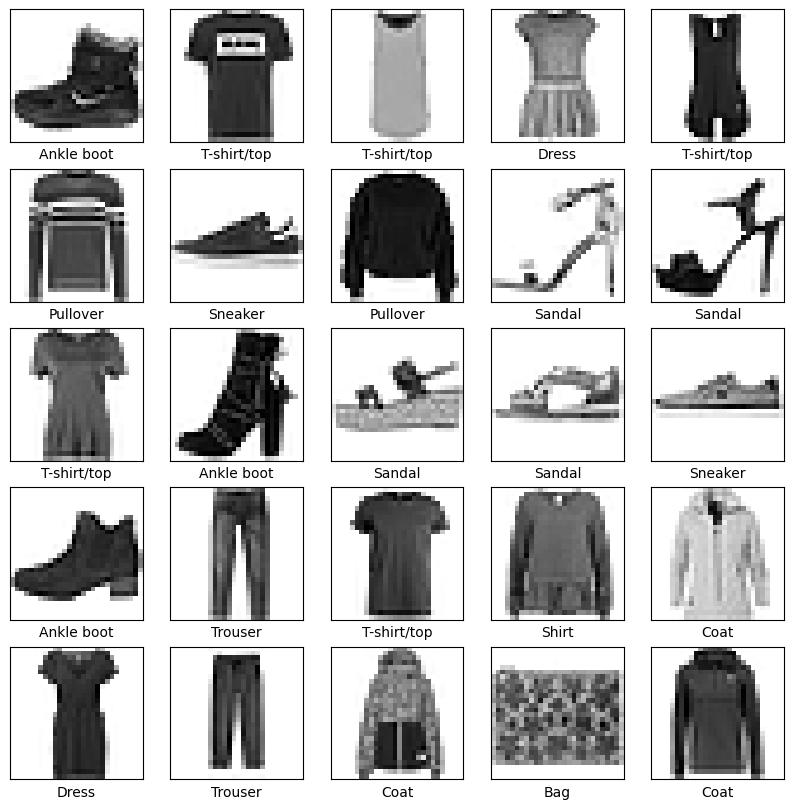

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Feed the model

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4956 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3756 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3360 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2972 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2823 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

### Evaluating accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 1s - loss: 0.3191 - accuracy: 0.8910 - 1s/epoch - 4ms/step

Test accuracy:  0.890999972820282


### Make predictions

In [21]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
predictions[0]

array([2.9953128e-07, 1.3594124e-07, 1.0417797e-09, 1.7878427e-09,
       1.1145936e-07, 4.0727784e-03, 1.8901517e-08, 7.9829246e-03,
       1.5039138e-06, 9.8794216e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
class_names[9]

'Ankle boot'

In [27]:
test_labels[0]

9

### Verify predictions

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

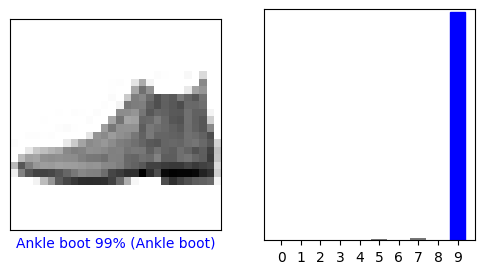

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

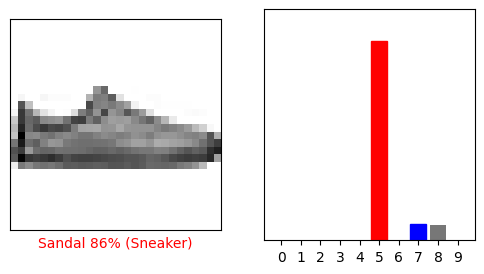

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

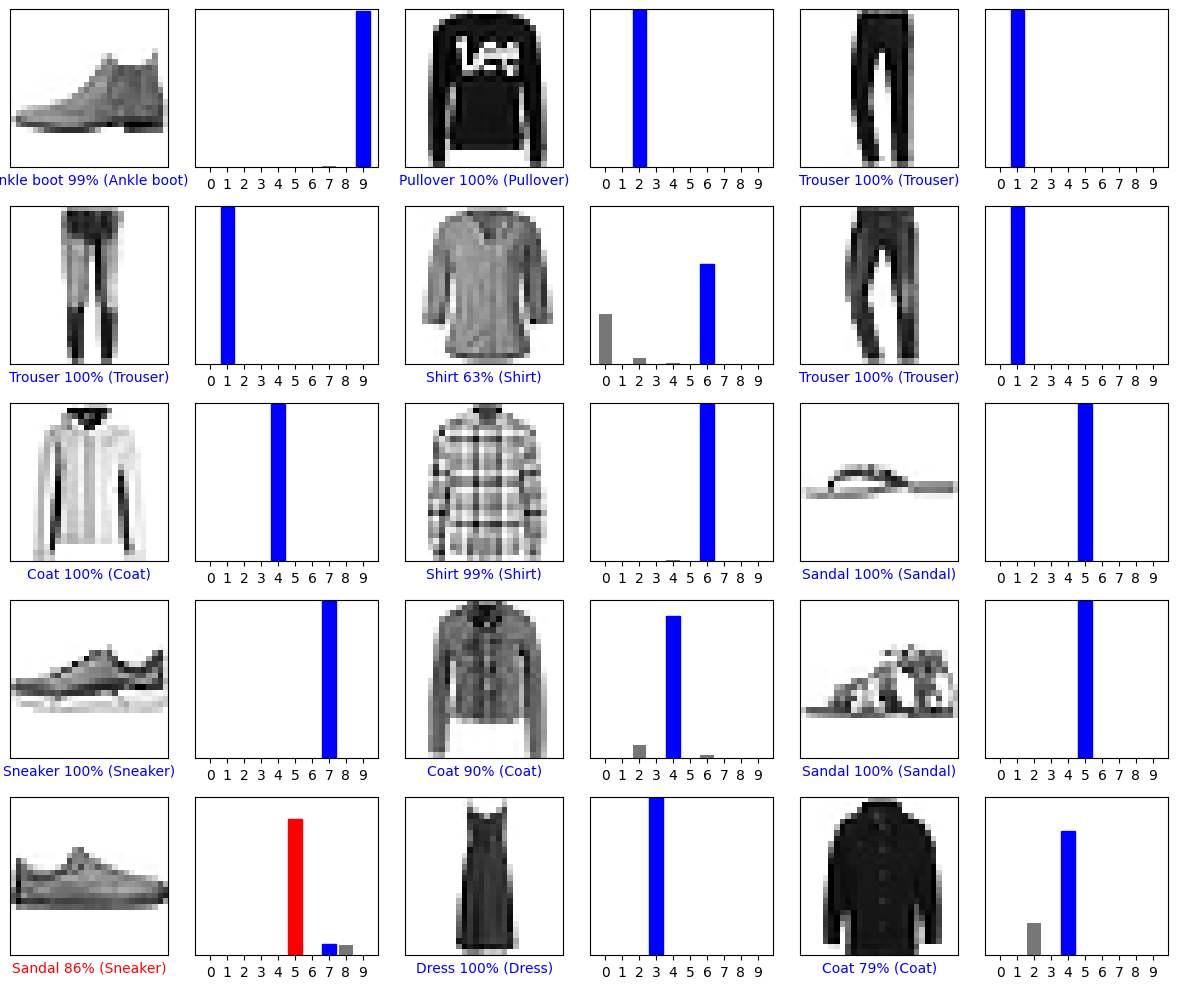

In [31]:
# plot the firsr x test images, their predicted labels, and true labels.
# color correct predictions in blue and incorrect predictions in red.

num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
img = test_images[1]
print(img.shape)

(28, 28)


In [33]:
# add the image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 42ms/step
[[1.2667925e-04 1.7551417e-11 9.9886572e-01 6.1607336e-10 9.7861723e-04
  2.6911879e-11 2.8946040e-05 3.5575328e-16 2.4039393e-09 3.5592391e-18]]


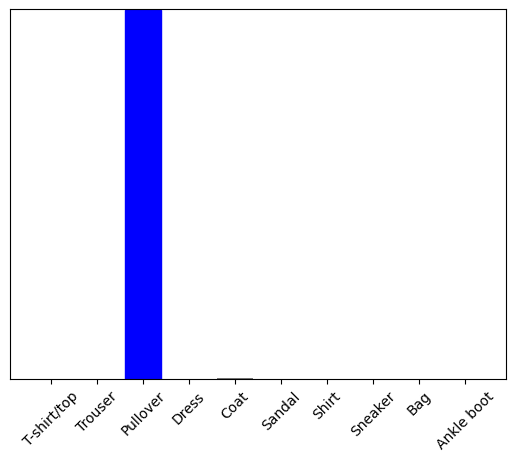

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])

2